In [1]:
import pandas as pd
import numpy as np

# matplotlib 한글대응
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system sorry.")

In [2]:
big5_raw = pd.read_csv('./data-final.csv', delimiter='\t')
big5_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
big5_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [4]:
big5_raw = big5_raw[big5_raw['IPC'] == 1]
# 결측치 제거
big5_raw.dropna(inplace=True)

In [5]:
# 문항에 긍정으로 답하는게 부정적인 경우 거꾸로 뒤집어 줌
big5_raw['EXT2'] = 5 - big5_raw['EXT2'] 
big5_raw['EXT4'] = 5 - big5_raw['EXT4'] 
big5_raw['EXT6'] = 5 - big5_raw['EXT6'] 
big5_raw['EXT8'] = 5 - big5_raw['EXT8'] 
big5_raw['EXT10'] = 5 - big5_raw['EXT10']  
big5_raw['EST4'] = 5 - big5_raw['EST4'] 
big5_raw['EST5'] = 5 - big5_raw['EST5']  
big5_raw['AGR1'] = 5 - big5_raw['AGR1'] 
big5_raw['AGR3'] = 5 - big5_raw['AGR3'] 
big5_raw['AGR5'] = 5 - big5_raw['AGR5'] 
big5_raw['AGR7'] = 5 - big5_raw['AGR7']  
big5_raw['CSN2'] = 5 - big5_raw['CSN2'] 
big5_raw['CSN4'] = 5 - big5_raw['CSN4'] 
big5_raw['CSN6'] = 5 - big5_raw['CSN6'] 
big5_raw['CSN8'] = 5 - big5_raw['CSN8']  
big5_raw['OPN2'] = 5 - big5_raw['OPN2'] 
big5_raw['OPN4'] = 5 - big5_raw['OPN4'] 
big5_raw['OPN6'] = 5 - big5_raw['OPN6']

In [6]:
# 필요없는 칼럼 제거
big5_raw.drop(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err','long_appx_lots_of_err'], axis=1, inplace=True)

In [7]:
# 일단 나라별로 문항 답변 데이터 집계

def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('country')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
big5_raw['Count'] = 1
big5_country = big5_raw.groupby(['country']).agg(ag(big5_raw))
big5_country.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,Count
country,,,,,,,,,,,,,,,,,,,,,
AD,2.666667,2.066667,2.866667,1.733333,3.400000,2.266667,3.066667,1.800000,2.866667,1.466667,...,7022.000000,4467.866667,7435.266667,4351.466667,4839.200000,5020.800000,3930.733333,5394.400000,3681.866667,15
AE,2.722010,2.103349,3.241627,1.860287,3.260766,2.384689,2.778469,1.763158,3.163158,1.497608,...,8848.950239,7826.140670,10244.434450,4158.619139,10281.193301,7831.704785,5712.321053,6030.011005,15184.092344,2090
AF,2.978261,2.152174,3.282609,1.739130,3.630435,2.456522,3.043478,1.630435,3.195652,1.608696,...,13827.652174,5621.347826,11671.521739,3797.130435,3786.739130,5406.304348,3295.282609,6474.021739,3929.608696,46
AG,2.318182,2.000000,3.045455,1.590909,3.590909,2.636364,2.272727,1.409091,2.227273,1.363636,...,7889.863636,4340.090909,5219.909091,3357.227273,3385.500000,4432.227273,14682.727273,4271.909091,3565.363636,22
AI,2.500000,2.000000,3.750000,1.500000,3.250000,2.500000,3.000000,1.000000,2.250000,1.000000,...,3339.500000,1883.250000,3780.750000,2875.000000,3700.750000,3813.250000,4399.750000,3697.750000,1842.500000,4


In [8]:
big5_country = big5_country.iloc[:,:50]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
big5_country_scaled = pd.DataFrame(scaler.fit_transform(big5_country), columns=big5_country.columns)
big5_country_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.373712,-0.028064,-0.758217,-0.044919,0.533867,-0.510401,1.045447,0.419577,-0.202862,0.160805,...,-0.209012,-0.607197,-0.452418,-0.078521,-0.056157,0.345779,-0.980833,-0.123091,0.517455,0.138360
1,0.493422,0.060291,0.184768,0.255045,0.200540,-0.229826,0.391425,0.335444,0.419401,0.239640,...,-0.455060,-0.527615,-0.029355,-0.571331,-0.114545,-0.090445,-0.203462,-0.536888,-0.408021,-0.181966
2,1.047708,0.177891,0.287833,-0.031222,1.085528,-0.059058,0.992824,0.032355,0.487598,0.522682,...,-0.564499,-1.370310,-0.085318,-1.341587,-0.639784,-1.384480,-0.354229,-0.569111,-0.284650,-0.147011
3,-0.380081,-0.188640,-0.308585,-0.381437,0.990904,0.368480,-0.756280,-0.473109,-1.544794,-0.101708,...,0.358235,-0.247979,0.762905,1.001869,-0.278032,1.026883,-0.575528,0.204241,0.775474,0.257697
4,0.013202,-0.188640,1.463271,-0.596235,0.174767,0.044303,0.894157,-1.407316,-1.497095,-1.028222,...,1.727453,0.127948,0.602994,0.581717,-0.208696,1.756638,-0.928991,2.288667,0.872232,1.451066


C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


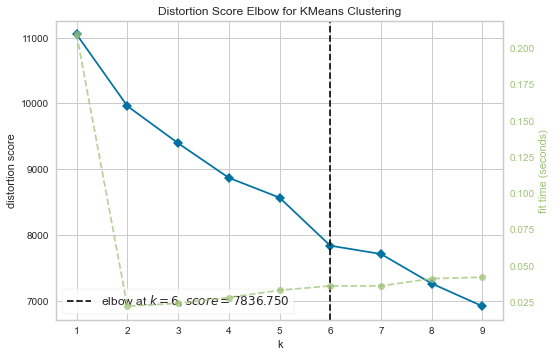

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# elbow 점수
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(big5_country_scaled)
visualizer.show()

In [11]:
# 실루엣 점수
from sklearn.metrics import silhouette_score

result = []

for i in range(2,8):
    km =  KMeans(n_clusters=i, max_iter=50, init='k-means++').fit(big5_country_scaled)
    result.append(silhouette_score(big5_country_scaled, km.labels_))
    

In [12]:
for i, item in enumerate(result):
    print(f'Cluster: {i+2}, Silhouette Score: {item}')

Cluster: 2, Silhouette Score: 0.31030545263477877
Cluster: 3, Silhouette Score: 0.22803465103895534
Cluster: 4, Silhouette Score: 0.10221573070843
Cluster: 5, Silhouette Score: 0.09933259393908106
Cluster: 6, Silhouette Score: 0.05667840986300946
Cluster: 7, Silhouette Score: 0.32322437163778406


- Best Cluster number
    - elbow: 5
    - silhouette: 4

- 두가지 모델 각각 비교

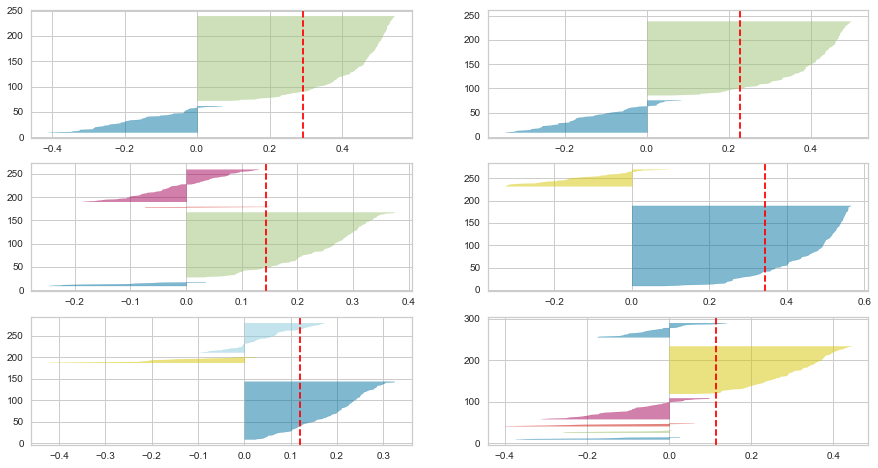

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(big5_country_scaled) 

- 실루엣 분석을 통해선 효과적으로 클러스터링이 된것 같지 않다.
- elbow를 통해 4일때 실제 데이터가 어떤지 다시 한번 보자

In [14]:
choose_cluster = KMeans(n_clusters=4, max_iter=100, init='k-means++', random_state=13)
choose_cluster.fit(big5_country_scaled)

KMeans(max_iter=100, n_clusters=4, random_state=13)

In [15]:
pca_df = big5_country_scaled.copy()
pca_df['Cluster_Id'] = choose_cluster.labels_
pca_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster_Id
0,0.373712,-0.028064,-0.758217,-0.044919,0.533867,-0.510401,1.045447,0.419577,-0.202862,0.160805,...,-0.607197,-0.452418,-0.078521,-0.056157,0.345779,-0.980833,-0.123091,0.517455,0.138360,1
1,0.493422,0.060291,0.184768,0.255045,0.200540,-0.229826,0.391425,0.335444,0.419401,0.239640,...,-0.527615,-0.029355,-0.571331,-0.114545,-0.090445,-0.203462,-0.536888,-0.408021,-0.181966,2
2,1.047708,0.177891,0.287833,-0.031222,1.085528,-0.059058,0.992824,0.032355,0.487598,0.522682,...,-1.370310,-0.085318,-1.341587,-0.639784,-1.384480,-0.354229,-0.569111,-0.284650,-0.147011,1
3,-0.380081,-0.188640,-0.308585,-0.381437,0.990904,0.368480,-0.756280,-0.473109,-1.544794,-0.101708,...,-0.247979,0.762905,1.001869,-0.278032,1.026883,-0.575528,0.204241,0.775474,0.257697,1
4,0.013202,-0.188640,1.463271,-0.596235,0.174767,0.044303,0.894157,-1.407316,-1.497095,-1.028222,...,0.127948,0.602994,0.581717,-0.208696,1.756638,-0.928991,2.288667,0.872232,1.451066,1


In [16]:
# Summing up the different questions groups
col_list = list(pca_df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = pca_df[ext].sum(axis=1)/10
data_sums['neurotic'] = pca_df[est].sum(axis=1)/10
data_sums['agreeable'] = pca_df[agr].sum(axis=1)/10
data_sums['conscientious'] = pca_df[csn].sum(axis=1)/10
data_sums['open'] = pca_df[opn].sum(axis=1)/10
data_sums['clusters'] = choose_cluster.labels_
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,-0.169963,-0.162326,1.016006,-1.333521,0.955095
1,0.017072,-0.191871,0.307591,0.377756,0.068414
2,-0.117028,0.180728,-0.297114,-0.195752,-0.124674
3,1.751691,-0.974699,0.915113,1.224469,0.333747


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(pca_df)

pca_result = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
pca_result['Clusters'] = choose_cluster.labels_
pca_result.head()

,PCA1,PCA2,Clusters
0,1.225633,0.167172,1
1,0.006580,0.062220,2
2,0.140315,-1.997547,1
3,-0.210739,-1.156328,1
4,4.029355,1.568324,1


Text(0.5, 1.0, 'Personality Clusters after PCA')

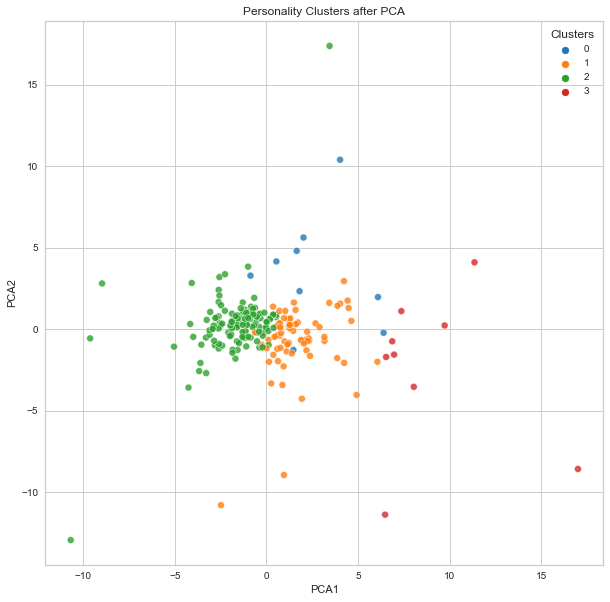

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_result, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA')

 - raw_data에 대해서 다시

In [19]:
big5_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,country,Count
0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,...,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,GB,1
1,3.0,0.0,3.0,1.0,3.0,2.0,2.0,0.0,1.0,0.0,...,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,MY,1
2,2.0,2.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,0.0,...,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,GB,1
3,2.0,3.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,...,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,GB,1
5,3.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,3.0,1.0,...,3656.0,4352.0,2681.0,3272.0,2640.0,1568.0,1640.0,3192.0,SE,1


In [20]:
raw_question_info = big5_raw.iloc[:,:50]
raw_question_info.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,5.0
1,3.0,0.0,3.0,1.0,3.0,2.0,2.0,0.0,1.0,0.0,...,1.0,3.0,4.0,3.0,3.0,4.0,4.0,2.0,5.0,3.0
2,2.0,2.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,0.0,...,5.0,4.0,2.0,4.0,4.0,3.0,5.0,3.0,4.0,4.0
3,2.0,3.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,...,4.0,3.0,5.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
5,3.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,3.0,1.0,...,5.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0


In [21]:
raw_cluster = KMeans(n_clusters= 4, init='k-means++', max_iter=200, random_state=13)
raw_cluster.fit(raw_question_info)

KMeans(max_iter=200, n_clusters=4, random_state=13)

In [22]:
raw_question_info['Clusters'] = raw_cluster.labels_

In [23]:
# Summing up the different questions groups
col_list = list(raw_question_info)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = raw_question_info[ext].sum(axis=1)/10
data_sums['neurotic'] = raw_question_info[est].sum(axis=1)/10
data_sums['agreeable'] = raw_question_info[agr].sum(axis=1)/10
data_sums['conscientious'] = raw_question_info[csn].sum(axis=1)/10
data_sums['open'] = raw_question_info[opn].sum(axis=1)/10
data_sums['clusters'] = raw_cluster.labels_
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.082132,2.436565,3.805456,3.463432,3.753473
1,1.883258,2.532803,2.710570,2.958885,3.479828
2,3.122014,3.244447,3.529126,2.530405,3.748952
3,1.609911,3.439065,3.258881,2.763894,3.472814


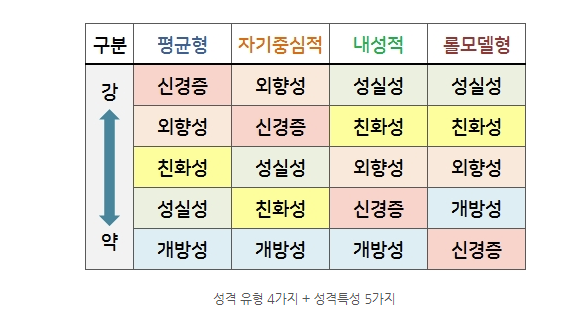

In [24]:
from IPython.display import Image
Image(filename='image.png')

- 외향성:extroversion, 친화성:agreeableness, 성실성: conscientiousness, 개방성: openness, 신경성: neurotic 에 따라서 매칭시켜 보기

In [25]:
personality_result = data_sums.groupby('clusters').mean()
personality_result

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.082132,2.436565,3.805456,3.463432,3.753473
1,1.883258,2.532803,2.710570,2.958885,3.479828
2,3.122014,3.244447,3.529126,2.530405,3.748952
3,1.609911,3.439065,3.258881,2.763894,3.472814


In [26]:
# 평균형
personality_result.sort_values(by=["neurotic", "extroversion", "agreeable", "conscientious","open"], ascending=False)

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
3,1.609911,3.439065,3.258881,2.763894,3.472814
2,3.122014,3.244447,3.529126,2.530405,3.748952
1,1.883258,2.532803,2.710570,2.958885,3.479828
0,3.082132,2.436565,3.805456,3.463432,3.753473


In [27]:
# 자기중심적
personality_result.sort_values(by=["extroversion", "neurotic", "conscientious", "agreeable", "open"], ascending=False)

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
2,3.122014,3.244447,3.529126,2.530405,3.748952
0,3.082132,2.436565,3.805456,3.463432,3.753473
1,1.883258,2.532803,2.710570,2.958885,3.479828
3,1.609911,3.439065,3.258881,2.763894,3.472814


In [28]:
# 내성적
personality_result.sort_values(by=["conscientious", "agreeable", "extroversion", "neurotic", "open"], ascending=False)

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.082132,2.436565,3.805456,3.463432,3.753473
1,1.883258,2.532803,2.710570,2.958885,3.479828
3,1.609911,3.439065,3.258881,2.763894,3.472814
2,3.122014,3.244447,3.529126,2.530405,3.748952


- 평균형: cluster1
- 자기중심형: cluster0
- 내성적: cluster3
- 롤모델형: cluster2

In [29]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(raw_question_info)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = raw_cluster.labels_
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.686289,-1.860265,0
1,-0.196044,3.035888,1
2,-1.001568,2.018697,1
3,0.815288,0.258069,1
4,-3.231531,2.289002,0


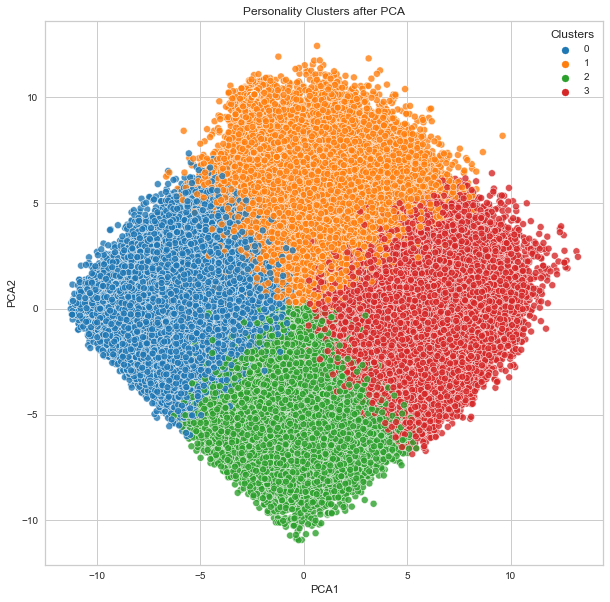

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [31]:
raw_cluster.cluster_centers_.shape

(4, 50)

In [32]:
# 각 클러스터별 센터
tmp = pd.DataFrame(raw_cluster.cluster_centers_, columns=raw_question_info.columns.to_list()[:-1])
tmp

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3.169329,2.785331,4.122466,2.481095,4.053749,3.174278,3.542772,1.913512,3.432858,2.153588,...,3.876668,3.196142,4.047189,3.166206,4.083773,3.298586,4.287700,3.195155,4.181787,4.201897
1,1.999396,1.493654,2.721218,1.363347,2.487476,2.119172,1.951178,1.237832,2.484659,0.983205,...,3.635202,3.055545,3.702434,2.991603,3.667603,2.975714,3.990506,3.155237,3.918285,3.709840
2,3.363809,3.025173,3.715800,2.452173,3.985208,3.164525,3.554314,2.228191,3.743170,1.976667,...,3.863052,2.986787,4.286438,3.113502,3.987126,3.275742,4.032676,3.477590,4.236151,4.229093
3,1.791873,1.390442,2.339518,0.954836,2.383307,1.895672,1.763903,0.887744,2.135658,0.547272,...,3.567277,2.689100,4.066647,2.910891,3.495994,2.961681,3.771603,3.170119,4.343956,3.747870


In [33]:
personality_result.reset_index(inplace=True)
personality_result

,clusters,extroversion,neurotic,agreeable,conscientious,open
0,0,3.082132,2.436565,3.805456,3.463432,3.753473
1,1,1.883258,2.532803,2.710570,2.958885,3.479828
2,2,3.122014,3.244447,3.529126,2.530405,3.748952
3,3,1.609911,3.439065,3.258881,2.763894,3.472814


In [34]:
personality_result['Personality_Type'] = ['자기중심형', '평균형', '롤모델형', '내성적형']
personality_result

,clusters,extroversion,neurotic,agreeable,conscientious,open,Personality_Type
0,0,3.082132,2.436565,3.805456,3.463432,3.753473,자기중심형
1,1,1.883258,2.532803,2.710570,2.958885,3.479828,평균형
2,2,3.122014,3.244447,3.529126,2.530405,3.748952,롤모델형
3,3,1.609911,3.439065,3.258881,2.763894,3.472814,내성적형


In [35]:
movie_user_info = pd.read_csv('../방아현/data/2018-personality-data.csv')
movie_user_info.columns = movie_user_info.columns.str.strip()
movie_user_big5 = movie_user_info[['userid', 'openness', 'agreeableness', 'emotional_stability',
		'conscientiousness', 'extraversion']]
movie_user_big5.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5


In [36]:
user_ratings = pd.read_csv('../방아현/data/new_ratings.csv', index_col=0)
user_ratings.head()

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,userid,movie_id,rating,tstamp,expected_name
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56,Toy Story (1995)
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55,Jumanji (1995)
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50,Grumpier Old Men (1995)
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30,Father of the Bride Part II (1995)
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02,Heat (1995)


- 위 성격은 만점이 7점 따라서 만점이 5점이라 쳤을떄의 결과로 환산시킨다.

In [37]:
movie_user_big5['openness'] = (movie_user_big5['openness'] / 7) *5
movie_user_big5['agreeableness'] = (movie_user_big5['agreeableness'] / 7) *5
movie_user_big5['emotional_stability'] = (movie_user_big5['emotional_stability'] / 7) *5
movie_user_big5['conscientiousness'] = (movie_user_big5['conscientiousness'] / 7) *5
movie_user_big5['extraversion'] = (movie_user_big5['extraversion'] / 7) *5

movie_user_big5.head()

C:\Users\sanghui\AppData\Local\Temp/ipykernel_20964/3807962954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_user_big5['openness'] = (movie_user_big5['openness'] / 7) *5
C:\Users\sanghui\AppData\Local\Temp/ipykernel_20964/3807962954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_user_big5['agreeableness'] = (movie_user_big5['agreeableness'] / 7) *5
C:\Users\sanghui\AppData\Local\Temp/ipykernel_20964/3807962954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,8e7cebf9a234c064b75016249f2ac65e,3.571429,1.428571,2.142857,1.785714,4.642857
1,77c7d756a093150d4377720abeaeef76,5.000000,2.857143,4.285714,3.928571,2.857143
2,b7e8a92987a530cc368719a0e60e26a3,2.857143,2.142857,3.214286,1.428571,1.785714
3,92561f21446e017dd6b68b94b23ad5b7,3.928571,3.928571,2.857143,3.214286,2.857143
4,030001ac2145a938b07e686a35a2d638,3.928571,3.928571,2.500000,3.214286,1.785714


In [38]:
personality_result.columns

Index(['clusters', 'extroversion', 'neurotic', 'agreeable', 'conscientious',
       'open', 'Personality_Type'],
      dtype='object')

In [39]:
user_cluster = []
user_type = []

for index, row in movie_user_big5.iterrows():
    distance = []
    # KNN
    for p_index, p_row in personality_result.iterrows():
        openness = (row['openness'] - p_row['open']) ** 2
        agreeableness = (row['agreeableness'] - p_row['agreeable']) ** 2
        emotional_stable = (row['emotional_stability'] - p_row['neurotic']) ** 2
        conscientious = (row['conscientiousness'] - p_row['conscientious']) ** 2
        extra = (row['extraversion'] - p_row['extroversion']) ** 2

        result = np.sqrt(openness + agreeableness + emotional_stable + conscientious + extra)
        distance.append((result, p_row['clusters'], p_row['Personality_Type']))
    
    # distance sort for finding minimum distance
    distance.sort(key=lambda x: x[0])
    user_cluster.append(distance[0][1])
    user_type.append(distance[0][2])

    
    

In [40]:
movie_user_big5['clusters'] = user_cluster
movie_user_big5['user_type'] = user_type

movie_user_big5.head()

C:\Users\sanghui\AppData\Local\Temp/ipykernel_20964/1284255478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_user_big5['clusters'] = user_cluster
C:\Users\sanghui\AppData\Local\Temp/ipykernel_20964/1284255478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_user_big5['user_type'] = user_type


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,clusters,user_type
0,8e7cebf9a234c064b75016249f2ac65e,3.571429,1.428571,2.142857,1.785714,4.642857,2,롤모델형
1,77c7d756a093150d4377720abeaeef76,5.000000,2.857143,4.285714,3.928571,2.857143,2,롤모델형
2,b7e8a92987a530cc368719a0e60e26a3,2.857143,2.142857,3.214286,1.428571,1.785714,3,내성적형
3,92561f21446e017dd6b68b94b23ad5b7,3.928571,3.928571,2.857143,3.214286,2.857143,0,자기중심형
4,030001ac2145a938b07e686a35a2d638,3.928571,3.928571,2.500000,3.214286,1.785714,1,평균형


In [41]:
user_ratings.head()

,userid,movie_id,rating,tstamp,expected_name
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56,Toy Story (1995)
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55,Jumanji (1995)
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50,Grumpier Old Men (1995)
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30,Father of the Bride Part II (1995)
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02,Heat (1995)


In [42]:
user_ratings.groupby('userid')

In [43]:
movie_user_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               1834 non-null   object 
 1   openness             1834 non-null   float64
 2   agreeableness        1834 non-null   float64
 3   emotional_stability  1834 non-null   float64
 4   conscientiousness    1834 non-null   float64
 5   extraversion         1834 non-null   float64
 6   assigned metric      1834 non-null   object 
 7   assigned condition   1834 non-null   object 
 8   movie_1              1834 non-null   int64  
 9   predicted_rating_1   1834 non-null   float64
 10  movie_2              1834 non-null   int64  
 11  predicted_rating_2   1834 non-null   float64
 12  movie_3              1834 non-null   int64  
 13  predicted_rating_3   1834 non-null   float64
 14  movie_4              1834 non-null   int64  
 15  predicted_rating_4   1834 non-null   f

In [44]:
len(user_ratings['userid'].unique())

1820

In [45]:
# 아이템 기반 협업 필터링
rating_user_cluster = []

user_id_list = user_ratings['userid'].unique().tolist()

for id in user_id_list:
    cnt = len(user_ratings[user_ratings['userid'] == id])
    cluster = movie_user_big5[movie_user_big5['userid'] == id]['clusters'].values[0]
    for _ in range(cnt):
        rating_user_cluster.append(cluster)

user_id_list
    



['8e7cebf9a234c064b75016249f2ac65e',
 '77c7d756a093150d4377720abeaeef76',
 'b7e8a92987a530cc368719a0e60e26a3',
 '92561f21446e017dd6b68b94b23ad5b7',
 '030001ac2145a938b07e686a35a2d638',
 'f91b2fb085d0feb47b86fc81b10207ee',
 'f7b0502be8c86203ce6acaffe59f993a',
 '36f31ef9879b4de96977aeba94878581',
 '653bb2f69ddd19e1cf1f9e1871916d71',
 '89d365a0d0f1a80ae8d079079a078155',
 '4d92401ed253aab37fa28a68d5d24d87',
 '875afaef12d7872b644948db1bb3040a',
 '2507e0e5af7f4c6bef436c8cd0e90bc3',
 '7500db258d55789ef86cbb29ffcb2016',
 '4d9071f72df26fe1d04196c8c6bb126e',
 '67fc933eadbe711d020d3f3c2136b087',
 'a258fd42676ec2550796eeb1b0028ea0',
 'e0ae9890c58fcfe19c89b45f5871add2',
 '0c6e74d0739fb94e2f3c8e5605497bbd',
 'b6a8cb7e55cbf2c1bde7f2b252203272',
 '7211a6a66a5fc549e2d74dacfbb555b2',
 '2d274b0dd0a7fe38bb172aed02270a7c',
 '428db88497a65655feb825365ad29a4a',
 '32babaf7d63853c83739e371efba6929',
 '183a0f30268fa6fda7b3609f8bcf0f44',
 'eefef5e8659f07c7ca44b300d51559d6',
 '838c3893b7166571c97e796dcaf456d7',
 

In [47]:
len(rating_user_cluster), user_ratings.shape

(1028751, (1028751, 5))

In [48]:
user_ratings['cluster'] = rating_user_cluster
user_ratings.head()

,userid,movie_id,rating,tstamp,expected_name,cluster
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56,Toy Story (1995),2
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55,Jumanji (1995),2
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50,Grumpier Old Men (1995),2
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30,Father of the Bride Part II (1995),2
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02,Heat (1995),2


In [50]:
user_ratings['cluster'].unique()

array([2, 3, 0, 1], dtype=int64)

In [51]:
user_ratings.pivot_table(index='movie_id', columns='cluster', values='rating', aggfunc='mean')

cluster,0,1,2,3
movie_id,,,,
1,3.721491,3.630699,3.719388,3.792647
2,3.125000,2.960227,3.251748,3.129870
3,2.703704,2.616667,2.739130,2.960526
4,2.388889,1.791667,2.200000,1.833333
5,2.743243,2.464286,2.515152,2.914286
...,...,...,...,...
198057,NaN,NaN,4.000000,NaN
198091,NaN,NaN,NaN,3.500000
198113,NaN,NaN,2.000000,NaN
